# Analisis Fourier pada Pengolahan Sinyal Digital

## 1: Pengenalan dan Persiapan

### 1.1 Import Library yang Diperlukan

```python
import numpy as np
import matplotlib.pyplot as plt
from time import time
from scipy import fft
```

Library-library di atas merupakan tools yang akan kita gunakan dalam praktikum ini:

1. **NumPy** (`np`): 
   - Library fundamental untuk komputasi numerik di Python
   - Menyediakan dukungan untuk arrays dan matriks multidimensi
   - Memiliki koleksi lengkap fungsi matematika untuk operasi array

2. **Matplotlib** (`plt`):
   - Library untuk membuat visualisasi data
   - Menghasilkan plot dan grafik dengan kualitas tinggi
   - Memiliki sintaks yang mirip dengan MATLAB

3. **Time** (`time`):
   - Modul Python standar untuk manipulasi waktu
   - Dalam praktikum ini digunakan untuk mengukur waktu komputasi
   - Membantu membandingkan efisiensi antara metode DFT dan FFT

4. **SciPy FFT** (`scipy.fft`):
   - Modul khusus untuk komputasi Fast Fourier Transform
   - Implementasi yang sudah dioptimasi untuk performa tinggi
   - Menyediakan berbagai fungsi terkait transformasi Fourier

### 1.2 Dasar Teori

#### Transformasi Fourier

Transformasi Fourier adalah teknik matematika yang digunakan untuk:
- Mengubah sinyal dari domain waktu ke domain frekuensi
- Menganalisis komponen frekuensi yang membentuk suatu sinyal
- Memungkinkan pemrosesan sinyal yang lebih efektif untuk berbagai aplikasi

Terdapat dua implementasi utama:

1. **Discrete Fourier Transform (DFT)**:
   - Implementasi dasar dari transformasi Fourier untuk sinyal diskrit
   - Kompleksitas komputasi O(N²)
   - Formula matematika:
     ```
     X[k] = Σ(n=0 to N-1) x[n] * e^(-j2πkn/N)
     ```
   - Dimana:
     - x[n] adalah sinyal input dalam domain waktu
     - X[k] adalah sinyal output dalam domain frekuensi
     - N adalah panjang sinyal
     - k adalah indeks frekuensi

2. **Fast Fourier Transform (FFT)**:
   - Algoritma yang lebih efisien untuk menghitung DFT
   - Kompleksitas komputasi O(N log N)
   - Menggunakan metode divide-and-conquer
   - Implementasi yang paling umum digunakan dalam praktik

### 1.3 Aplikasi

Transformasi Fourier memiliki banyak aplikasi dalam kehidupan nyata:
- Pemrosesan sinyal audio (equalizer, filter)
- Analisis getaran mesin
- Pengolahan citra digital
- Kompresi data
- Analisis sinyal biomedis (EEG, ECG)
- Sistem komunikasi
- Spectral analysis dalam berbagai bidang sains

Dalam praktikum ini, kita akan:
1. Membuat sinyal sintetis dengan berbagai komponen frekuensi
2. Mengimplementasikan DFT dan FFT dari dasar
3. Menggunakan implementasi FFT dari SciPy
4. Membandingkan hasil dan performa dari ketiga metode
5. Memvisualisasikan dan menganalisis hasilnya

### 1.4 Catatan Penting
- Pastikan semua library sudah terinstall dengan benar
- Gunakan environment Python yang konsisten
- Perhatikan versioning dari library yang digunakan
- Siapkan pemahaman dasar matematika dan pemrograman Python

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from scipy import fft

# 2. Membuat Sinyal

In [11]:
# Signal parameters
duration = 5  # seconds
fs = 1000  # Hz
freq_1 = 5  # Hz
freq_2 = 12  # Hz
freq_3 = 20  # Hz

# Time array
t = np.linspace(0, duration, int(fs * duration))

# Generate individual components
signal_1 = 1.0 * np.sin(2 * np.pi * freq_1 * t)
signal_2 = 0.5 * np.sin(2 * np.pi * freq_2 * t)  # Half amplitude
signal_3 = 0.3 * np.sin(2 * np.pi * freq_3 * t)  # One-third amplitude

# Combine signals
combined_signal = signal_1 + signal_2 + signal_3

# Add some noise
np.random.seed(42)  # for reproducibility
noise = 0.1 * np.random.normal(0, 1, len(t))
noisy_signal = combined_signal + noise

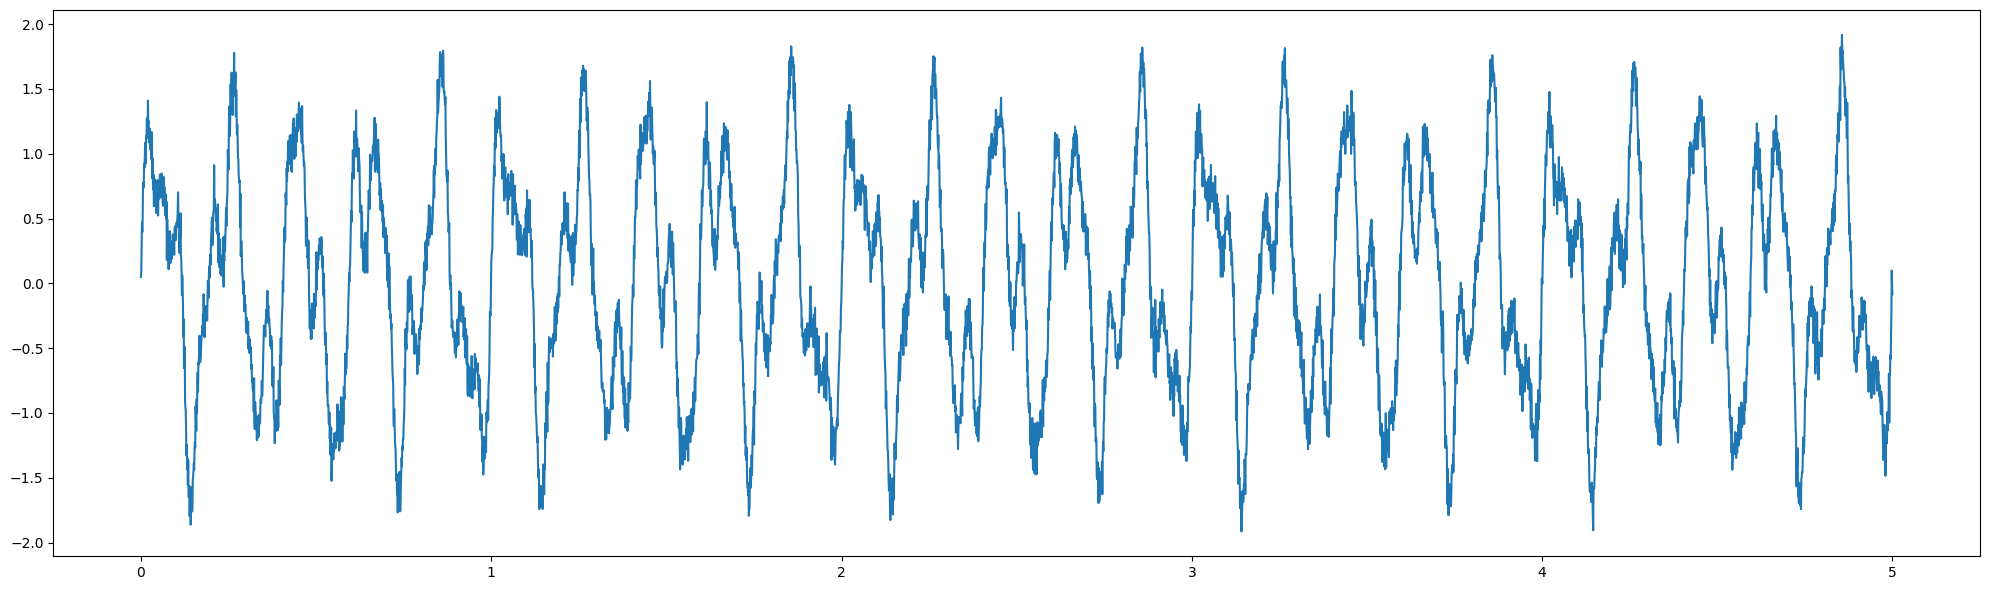

In [12]:
plt.figure(figsize=(20, 6))
plt.plot(t, noisy_signal, label='Noisy signal')
plt.tight_layout()
plt.show()

### 2.1 Pengaturan Parameter Sinyal

```python
# Signal parameters
duration = 5  # seconds
fs = 1000  # Hz
freq_1 = 5  # Hz
freq_2 = 12  # Hz
freq_3 = 20  # Hz
```

Parameter-parameter di atas menentukan karakteristik sinyal yang akan dibuat:
- `duration`: Panjang sinyal dalam detik
- `fs` (sampling frequency): Jumlah sampel per detik
- `freq_1`, `freq_2`, `freq_3`: Komponen frekuensi yang akan digabungkan

### 2.2 Pembuatan Array Waktu

```python
# Time array
t = np.linspace(0, duration, int(fs * duration))
```

- Fungsi `np.linspace()` membuat array dengan nilai yang terdistribusi merata
- Parameter:
  - Start: 0 detik
  - Stop: duration (5 detik)
  - Num: fs * duration (total sampel)
- Menghasilkan array waktu diskrit untuk sampling sinyal

### 2.3 Pembuatan Komponen Sinyal

```python
# Generate individual components
signal_1 = 1.0 * np.sin(2 * np.pi * freq_1 * t)
signal_2 = 0.5 * np.sin(2 * np.pi * freq_2 * t)  # Half amplitude
signal_3 = 0.3 * np.sin(2 * np.pi * freq_3 * t)  # One-third amplitude
```

Setiap komponen sinyal dibuat menggunakan fungsi sinus dengan karakteristik:
1. **Signal 1**: 
   - Frekuensi 5 Hz
   - Amplitudo 1.0 (amplitudo penuh)
   
2. **Signal 2**:
   - Frekuensi 12 Hz
   - Amplitudo 0.5 (setengah dari signal 1)
   
3. **Signal 3**:
   - Frekuensi 20 Hz
   - Amplitudo 0.3 (sepertiga dari signal 1)

Formula yang digunakan: A * sin(2πft)
- A: Amplitudo
- f: Frekuensi
- t: Waktu
- 2π: Konversi ke radian

### 2.4 Penggabungan Sinyal

```python
# Combine signals
combined_signal = signal_1 + signal_2 + signal_3
```

- Ketiga sinyal dijumlahkan untuk membuat sinyal komposit
- Hasil penjumlahan menghasilkan sinyal yang lebih kompleks
- Setiap komponen frekuensi masih dapat diidentifikasi melalui analisis Fourier

### 2.5 Penambahan Noise

```python
# Add some noise
np.random.seed(42)  # for reproducibility
noise = 0.1 * np.random.normal(0, 1, len(t))
noisy_signal = combined_signal + noise
```

Penambahan noise membuat sinyal lebih realistis:
- `np.random.seed(42)`: Memastikan hasil random yang konsisten setiap kali kode dijalankan
- `np.random.normal()`: Membuat noise Gaussian dengan:
  - Mean: 0
  - Standard deviation: 1
  - Amplitudo noise: 0.1 (10% dari amplitudo signal_1)
- `noisy_signal`: Sinyal akhir yang akan dianalisis

### Catatan Penting
1. Frekuensi sampling (fs = 1000 Hz) harus memenuhi Teorema Nyquist:
   - fs > 2 * fmax
   - fmax = 20 Hz (freq_3)
   - 1000 Hz >> 2 * 20 Hz = 40 Hz ✓

2. Amplitudo berbeda membantu dalam:
   - Membedakan komponen frekuensi
   - Menguji sensitivitas metode analisis Fourier
   - Memverifikasi akurasi magnitude spectrum

3. Noise menambahkan realisme karena dalam praktik:
   - Sinyal nyata selalu mengandung noise
   - Sistem pengukuran memiliki ketidakpastian
   - Lingkungan dapat mempengaruhi sinyal

# 3. Fungsi DFT

In [13]:
def calculate_dft(signal):
    """
    Calculate Discrete Fourier Transform (DFT) manually.
    
    Parameters:
    signal (array): Input time domain signal
    
    Returns:
    array: Frequency domain representation
    """
    N = len(signal)
    dft = np.zeros(N, dtype=complex)
    
    for k in range(N):  # Frequency
        for n in range(N):  # Time
            dft[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
    
    return dft

### 3.1 Penjelasan Fungsi `calculate_dft`

```python
def calculate_dft(signal):
    """
    Calculate Discrete Fourier Transform (DFT) manually.
    
    Parameters:
    signal (array): Input time domain signal
    
    Returns:
    array: Frequency domain representation
    """
```
Fungsi ini menerima parameter `signal` berupa array yang merepresentasikan sinyal dalam domain waktu (time domain) dan mengembalikan representasi sinyal tersebut dalam domain frekuensi (frequency domain).

### 3.2 Inisialisasi Variabel

```python
N = len(signal)
dft = np.zeros(N, dtype=complex)
```

- `N`: Menyimpan panjang sinyal input
- `dft`: Membuat array kosong sepanjang N dengan tipe data complex
  - Menggunakan tipe complex karena hasil DFT memiliki komponen real dan imaginary
  - Diinisialisasi dengan nilai nol

### 3.3 Implementasi Algoritma DFT

```python
for k in range(N):  # Frequency
    for n in range(N):  # Time
        dft[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
```

Bagian ini mengimplementasikan formula DFT:
- Loop pertama (`k`): Merepresentasikan komponen frekuensi
- Loop kedua (`n`): Merepresentasikan sampel waktu

Formula DFT yang diimplementasikan:
```
X[k] = Σ(n=0 to N-1) x[n] * e^(-j2πkn/N)
```

Dimana:
- `x[n]` = `signal[n]`: Sinyal input pada waktu n
- `X[k]` = `dft[k]`: Hasil transformasi pada frekuensi k
- `e^(-j2πkn/N)` = `np.exp(-2j * np.pi * k * n / N)`: Faktor exponential complex

### 3.4 Penjelasan Detail Komponen

1. **Faktor Exponential**:
   - `-2j`: Menandakan komponen imaginary negatif
   - `np.pi`: Konstanta π
   - `k * n / N`: Normalisasi frekuensi

2. **Proses Akumulasi**:
   - `dft[k] +=`: Menjumlahkan kontribusi setiap sampel waktu
   - Setiap `k` menghasilkan satu titik dalam spektrum frekuensi

### 3.5 Kompleksitas dan Performa

- Kompleksitas waktu: O(N²)
  - Dua nested loop, masing-masing berjalan N kali
  - Tidak efisien untuk sinyal panjang
  
- Memory usage: O(N)
  - Menyimpan array hasil sepanjang N
  - Tipe data complex membutuhkan lebih banyak memori

### 3.6 Karakteristik Output

Output fungsi ini memiliki beberapa karakteristik penting:
1. Panjang output sama dengan panjang input (N)
2. Hasil berupa array complex
3. Magnitude dapat dihitung dengan `np.abs(dft)`
4. Phase dapat dihitung dengan `np.angle(dft)`
5. Setengah pertama array (0 sampai N/2) merepresentasikan frekuensi positif
6. Setengah kedua array (N/2 sampai N-1) merepresentasikan frekuensi negatif

In [14]:

def calculate_fft(signal):
    """
    Calculate Fast Fourier Transform (FFT) using iterative decimation in time.
    
    Parameters:
    signal (array): Input time domain signal
    
    Returns:
    array: Frequency domain representation
    """
    signal = np.asarray(signal, dtype=complex)
    N = len(signal)
    
    # Find next power of 2
    power = int(np.ceil(np.log2(N)))
    size = 1 << power  # 2^power
    
    # Pad signal with zeros to make it length of power of 2
    signal = np.pad(signal, (0, size - N))
    
    # Bit reversal permutation
    bits = power
    j = 0
    for i in range(1, size):
        swapPos = size >> 1
        
        while j >= swapPos:
            j -= swapPos
            swapPos >>= 1
            if swapPos == 0:
                break
                
        j += swapPos
        
        if i < j:
            signal[i], signal[j] = signal[j], signal[i]
    
    # Compute FFT using decimation in time
    block_size = 2
    while block_size <= size:
        angle = -2 * np.pi / block_size
        w = np.exp(1j * angle)
        
        for i in range(0, size, block_size):
            current_w = 1
            
            for j in range(i, i + block_size // 2):
                k = j + block_size // 2
                temp = current_w * signal[k]
                signal[k] = signal[j] - temp
                signal[j] = signal[j] + temp
                current_w *= w
                
        block_size *= 2
    
    # Return only the part corresponding to the original signal length
    return signal[:N]


# 4. Fungsi FFT

In [15]:


# Now let's compare them
N = len(noisy_signal)
freq = np.fft.fftfreq(N, d=1/fs)

# Calculate DFT and measure time
start_time = time()
dft_result = calculate_dft(noisy_signal)
dft_time = time() - start_time

# Calculate FFT and measure time
start_time = time()
fft_result = calculate_fft(noisy_signal)
fft_time = time() - start_time


### 4.1 Definisi Fungsi dan Persiapan Data

```python
def calculate_fft(signal):
    signal = np.asarray(signal, dtype=complex)
    N = len(signal)
```
- Fungsi menerima sinyal input dalam domain waktu
- Mengkonversi input menjadi array NumPy bertipe complex
- Menyimpan panjang sinyal asli dalam variabel N

### 4.2 Padding Sinyal ke Power of 2

```python
# Find next power of 2
power = int(np.ceil(np.log2(N)))
size = 1 << power  # 2^power

# Pad signal with zeros
signal = np.pad(signal, (0, size - N))
```

- FFT bekerja optimal dengan panjang sinyal 2^n
- Mencari power of 2 terdekat yang lebih besar dari N
- Contoh: 
  - Jika N = 1000
  - Next power of 2 = 1024 (2^10)
- Menambahkan nilai nol (zero padding) hingga mencapai panjang yang diinginkan

### 4.3 Bit Reversal Permutation

```python
bits = power
j = 0
for i in range(1, size):
    swapPos = size >> 1
    
    while j >= swapPos:
        j -= swapPos
        swapPos >>= 1
        if swapPos == 0:
            break
            
    j += swapPos
    
    if i < j:
        signal[i], signal[j] = signal[j], signal[i]
```

- Mengatur ulang posisi sampel untuk optimasi FFT
- Menggunakan operasi bitwise untuk efisiensi
- Proses ini penting untuk algoritma decimation-in-time
- Memastikan input terurut sesuai kebutuhan butterfly diagram

### 4.4 Implementasi FFT dengan Decimation in Time

```python
block_size = 2
while block_size <= size:
    angle = -2 * np.pi / block_size
    w = np.exp(1j * angle)
    
    for i in range(0, size, block_size):
        current_w = 1
        
        for j in range(i, i + block_size // 2):
            k = j + block_size // 2
            temp = current_w * signal[k]
            signal[k] = signal[j] - temp
            signal[j] = signal[j] + temp
            current_w *= w
            
    block_size *= 2
```

Proses ini menerapkan algoritma Cooley-Tukey FFT:
1. **Inisialisasi**:
   - Mulai dengan block_size = 2
   - Menghitung twiddle factor (w)

2. **Butterfly Operations**:
   - Memproses sinyal dalam blok-blok
   - Menggabungkan hasil secara rekursif
   - Menggunakan operasi butterfly untuk efisiensi

3. **Iterasi**:
   - block_size dikalikan 2 setiap iterasi
   - Proses berlanjut hingga mencapai ukuran sinyal penuh

### 4.5 Pengembalian Hasil

```python
return signal[:N]
```
- Mengembalikan sinyal sepanjang N (panjang asli)
- Membuang zero padding yang ditambahkan sebelumnya

### 4.6 Karakteristik dan Keunggulan

1. **Kompleksitas**:
   - O(N log N) vs O(N²) pada DFT
   - Jauh lebih efisien untuk sinyal panjang

2. **Keakuratan**:
   - Hasil identik dengan DFT
   - Error numerik minimal

3. **Batasan**:
   - Optimal untuk panjang sinyal 2^n
   - Memerlukan memory tambahan untuk padding

### Catatan Implementasi

1. **Memory Usage**:
   - Operasi in-place (mengubah array input)
   - Memerlukan memory tambahan untuk padding

2. **Optimasi**:
   - Menggunakan operasi bitwise untuk efisiensi
   - Menghindari alokasi memory berlebihan

3. **Perbandingan dengan DFT**:
   - Hasil matematis identik
   - Perbedaan hanya pada efisiensi komputasi
   - Cocok untuk aplikasi real-time

4. **Best Practices**:
   - Gunakan untuk sinyal panjang (N > 32)
   - Verifikasi hasil dengan membandingkan magnitude spectrum
   - Monitor penggunaan memory untuk sinyal sangat panjang

# 5. Visualisasi

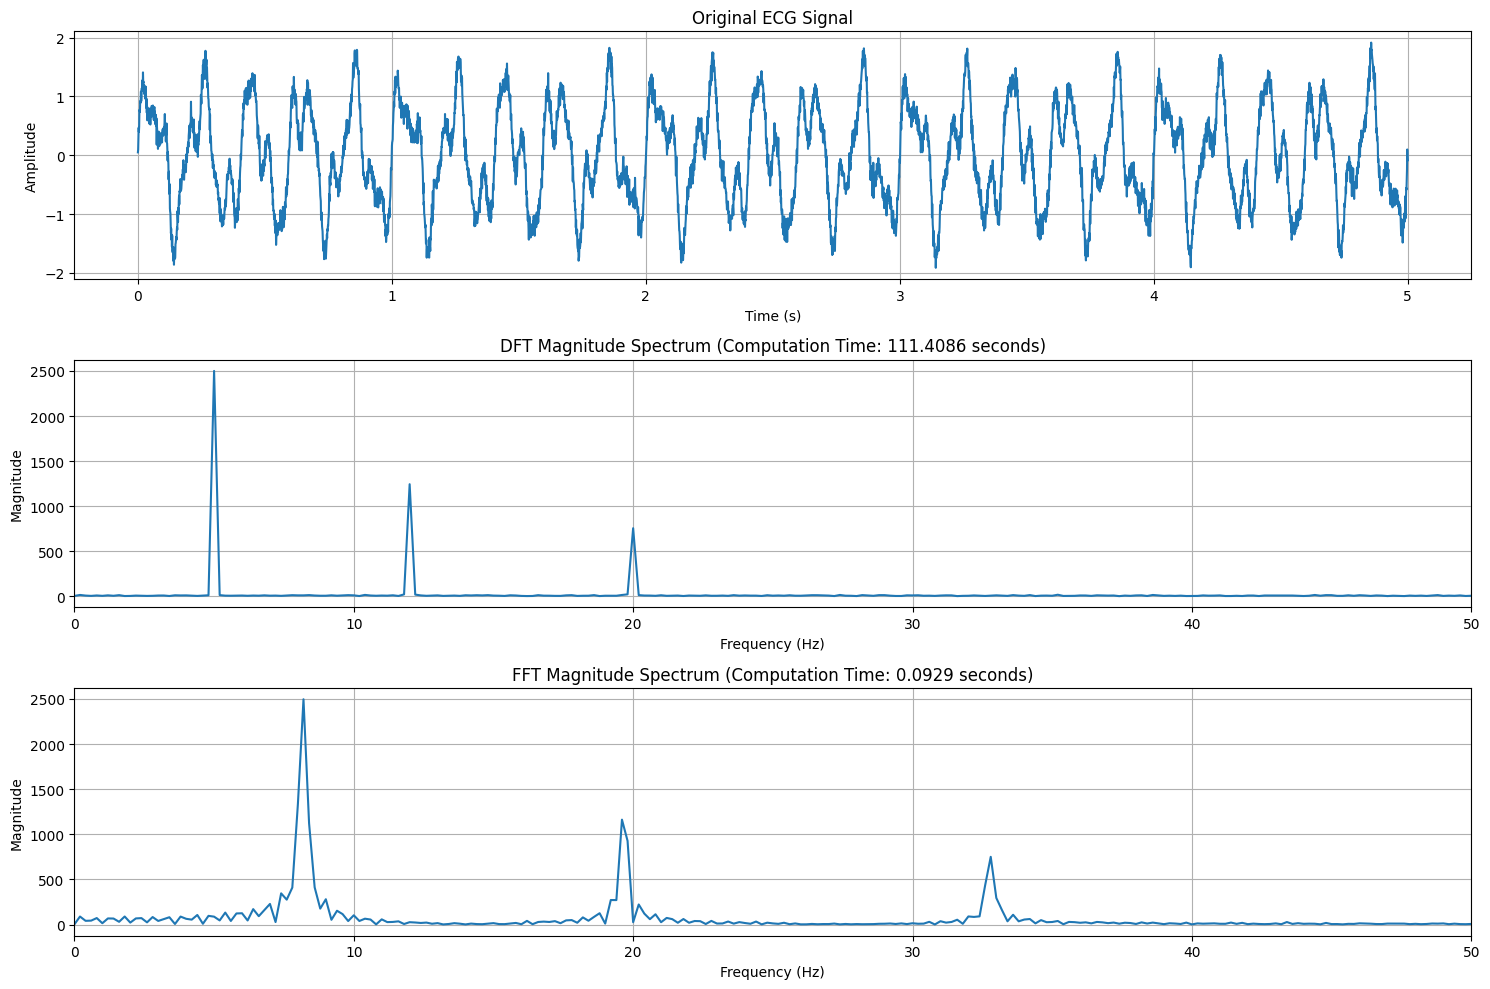

DFT Computation Time: 111.4086 seconds
FFT Computation Time: 0.0929 seconds
Speed-up factor: 1198.74x
Maximum difference between DFT and FFT: 2.56e+03


In [16]:

# Create visualization
plt.figure(figsize=(15, 10))

# Plot original signal
plt.subplot(3, 1, 1)
plt.plot(t, noisy_signal)
plt.title('Original ECG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Find index corresponding to 150 Hz
freq_mask = (freq >= 0) & (freq <= 50)

# Plot DFT magnitude spectrum
plt.subplot(3, 1, 2)
plt.plot(freq[freq_mask], np.abs(dft_result)[freq_mask])
plt.title(f'DFT Magnitude Spectrum (Computation Time: {dft_time:.4f} seconds)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 50)

# Plot FFT magnitude spectrum
plt.subplot(3, 1, 3)
plt.plot(freq[freq_mask], np.abs(fft_result)[freq_mask])
plt.title(f'FFT Magnitude Spectrum (Computation Time: {fft_time:.4f} seconds)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 50)

plt.tight_layout()
plt.show()

# Print performance comparison
print(f"DFT Computation Time: {dft_time:.4f} seconds")
print(f"FFT Computation Time: {fft_time:.4f} seconds")
print(f"Speed-up factor: {dft_time/fft_time:.2f}x")
print(f"Maximum difference between DFT and FFT: {np.max(np.abs(dft_result - fft_result)):.2e}")

# 6. Implementasi FFT dengan SciPy

In [17]:
def calculate_scipy_fft(signal, fs):
    """
    Calculate FFT using SciPy's implementation.
    
    Parameters:
    signal (array): Input time domain signal
    fs (float): Sampling frequency in Hz
    
    Returns:
    tuple: (frequencies, fft_result)
    """
    N = len(signal)
    
    # Calculate FFT
    fft_result = fft.fft(signal)
    
    # Calculate frequency axis
    frequencies = fft.fftfreq(N, d=1/fs)
    
    return frequencies, fft_result


## Hasil dengan menggunakan FFT dari SciPy

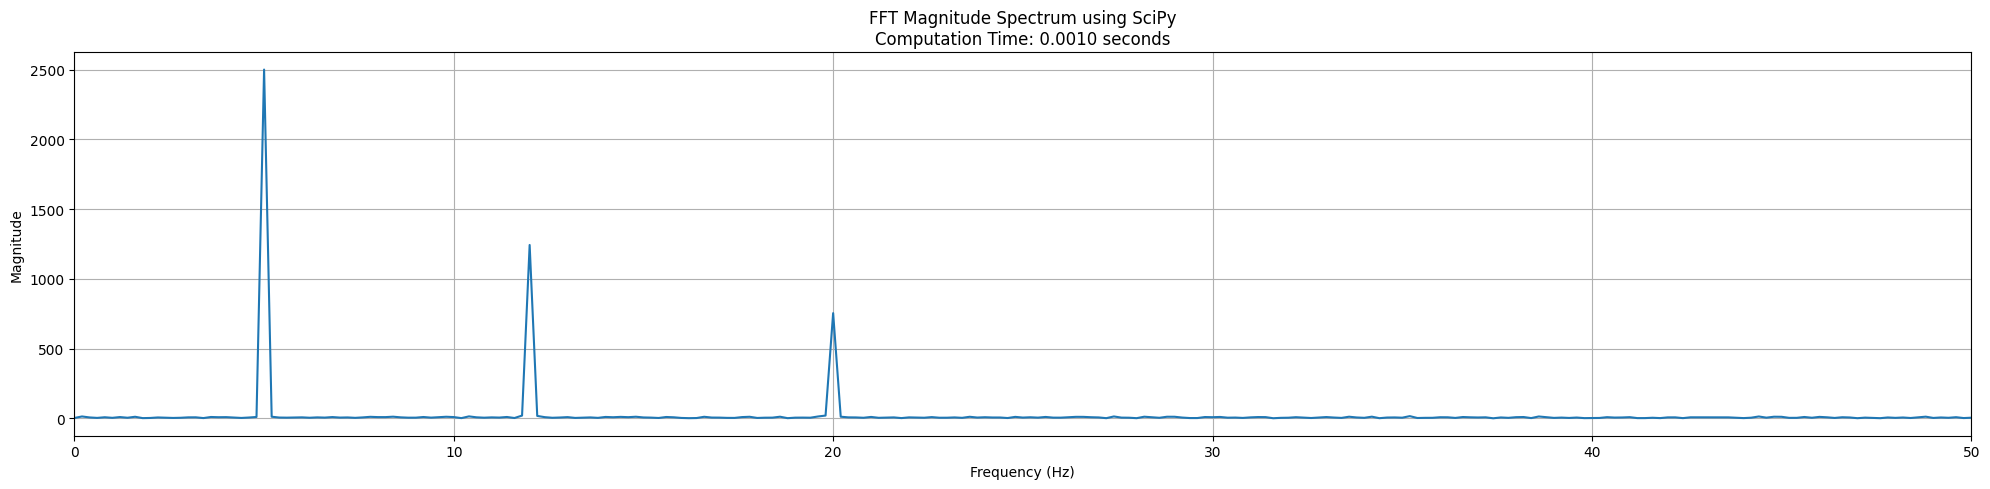

SciPy FFT Computation Time: 0.0010 seconds


In [18]:

# Calculate FFT and measure time
start_time = time()
freq, fft_result = calculate_scipy_fft(noisy_signal, fs)
scipy_fft_time = time() - start_time

# Create visualization
plt.figure(figsize=(20, 5))

# Find index corresponding to 50 Hz
freq_mask = (freq >= 0) & (freq <= 50)

# Plot magnitude spectrum
plt.plot(freq[freq_mask], np.abs(fft_result)[freq_mask])
plt.title(f'FFT Magnitude Spectrum using SciPy\nComputation Time: {scipy_fft_time:.4f} seconds')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 50)

plt.tight_layout()
plt.show()

print(f"SciPy FFT Computation Time: {scipy_fft_time:.4f} seconds")

---
## Tugas: `ho2`

#### Instruksi:

### Tugas 1: Analisis Pengaruh Noise pada Sinyal Sinusoid

**Tujuan:**
- Memahami pengaruh noise terhadap spektrum frekuensi
- Membandingkan performa DFT dan FFT
- Mempelajari visualisasi sinyal dalam domain waktu dan frekuensi

**Langkah Percobaan:**
```python
# 1. Buat sinyal sinusoid sederhana
fs = 1000  # sampling frequency
t = np.linspace(0, 2, 2*fs)  # 2 detik sinyal
f1 = 10  # frekuensi 10 Hz
signal = np.sin(2 * np.pi * f1 * t)

# 2. Tambahkan noise dengan berbagai level
noise_levels = [0.1, 0.5, 1.0]  # level noise yang berbeda
plt.figure(figsize=(15, 10))

for i, noise_level in enumerate(noise_levels, 1):
    # Tambahkan noise
    noisy_signal = signal + noise_level * np.random.normal(0, 1, len(t))
    
    # Hitung FFT
    freq, fft_result = calculate_scipy_fft(noisy_signal, fs)
    
    # Plot
    plt.subplot(3, 2, 2*i-1)
    plt.plot(t[:100], noisy_signal[:100])  # Plot 100 sampel pertama
    plt.title(f'Sinyal dengan Noise Level {noise_level}')
    plt.xlabel('Waktu (s)')
    plt.ylabel('Amplitudo')
    
    plt.subplot(3, 2, 2*i)
    freq_mask = (freq >= 0) & (freq <= 30)  # Plot 0-30 Hz
    plt.plot(freq[freq_mask], np.abs(fft_result)[freq_mask])
    plt.title(f'Spektrum Frekuensi')
    plt.xlabel('Frekuensi (Hz)')
    plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()
```

**Tugas:**
- Jelaskan pengaruh level noise terhadap:
   - Bentuk sinyal dalam domain waktu
   - Spektrum frekuensi yang dihasilkan
- Pada level noise berapa sinyal asli (10 Hz) masih dapat diidentifikasi dengan jelas?
- Bandingkan waktu komputasi antara DFT dan FFT untuk sinyal ini

### Tugas 2: Deteksi Multiple Frequency Components

**Tujuan:**
- Memahami konsep frequency resolution
- Menganalisis sinyal dengan multiple frequency components
- Mempraktikkan penggunaan FFT untuk analisis frekuensi

**Langkah Percobaan:**
```python
# 1. Buat sinyal dengan tiga frekuensi yang berdekatan
fs = 1000  # sampling frequency
t = np.linspace(0, 5, 5*fs)  # 5 detik sinyal

# Buat tiga sinyal dengan frekuensi berdekatan
f1, f2, f3 = 10, 12, 15  # frekuensi dalam Hz
signal = (np.sin(2 * np.pi * f1 * t) + 
          0.8 * np.sin(2 * np.pi * f2 * t) + 
          0.5 * np.sin(2 * np.pi * f3 * t))

# 2. Analisis dengan panjang window berbeda
window_sizes = [fs//2, fs, fs*2]  # 0.5s, 1s, 2s windows

plt.figure(figsize=(15, 10))
for i, window_size in enumerate(window_sizes, 1):
    # Ambil sebagian sinyal sesuai window
    windowed_signal = signal[:window_size]
    t_window = t[:window_size]
    
    # Hitung FFT
    freq, fft_result = calculate_scipy_fft(windowed_signal, fs)
    
    # Plot
    plt.subplot(3, 2, 2*i-1)
    plt.plot(t_window, windowed_signal)
    plt.title(f'Sinyal dengan Window {window_size/fs}s')
    plt.xlabel('Waktu (s)')
    plt.ylabel('Amplitudo')
    
    plt.subplot(3, 2, 2*i)
    freq_mask = (freq >= 0) & (freq <= 20)
    plt.plot(freq[freq_mask], np.abs(fft_result)[freq_mask])
    plt.title(f'Spektrum Frekuensi')
    plt.xlabel('Frekuensi (Hz)')
    plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()
```

**Tugas:**
- Jelaskan pengaruh panjang window terhadap:
   - Frequency resolution (kemampuan membedakan frekuensi yang berdekatan)
   - Magnitude spectrum yang dihasilkan
- Window size berapa yang paling optimal untuk mendeteksi ketiga frekuensi?
- Hitung frequency resolution (Δf = fs/N) untuk setiap window size
- Jelaskan trade-off antara frequency resolution dan time resolution


### Ketentuan Penamaan File
```
nim_ho2.ipynb
```

### Pengumpulan
- Unggah `.ipynb` ke repositori anda.
- Paste link dari file ke google form pengumpulan tugas
- Export `.ipynb` menjadi `.pdf` dan unggah juga ke google form

Link yang di paste harus mirip dengan format berikut:
```
https://github.com/<username>/<kode_mk>/blob/master/<nim_ho1>.ipynb
```

- *Pastikan repo anda bersifat privat dan anda telah mengundang dosen pengampu ke repositori anda*
- Seluruh tugas untuk ho1 digabung dalam satu file notebook `.ipynb`
- Berikan penjelasan yang sedetail-detailnya untuk setiap bagian eksperimen yang anda lakukan